In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [60]:
data=pd.read_csv('winequality.csv')

In [61]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


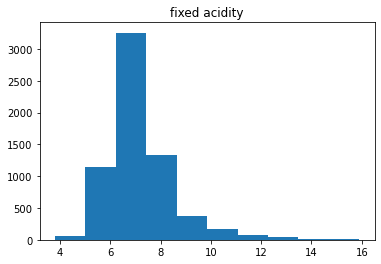

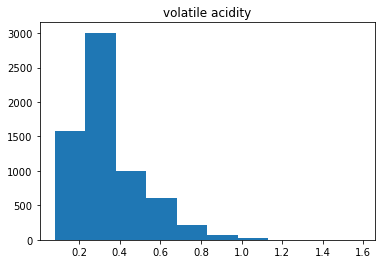

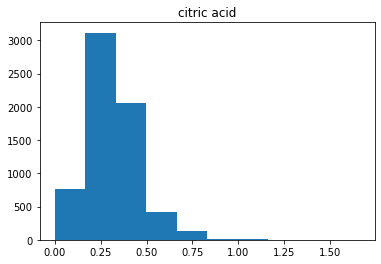

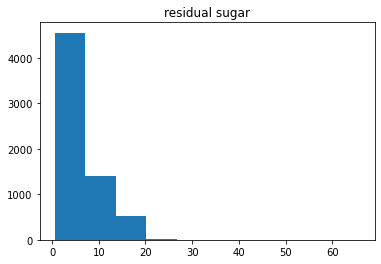

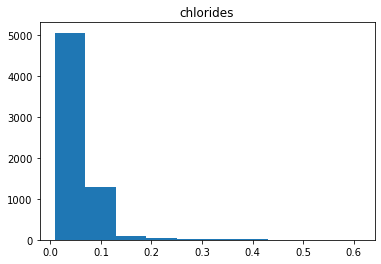

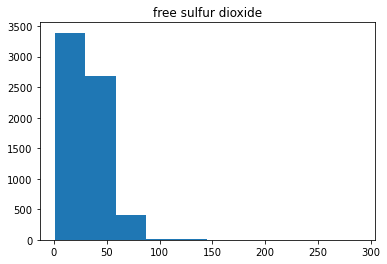

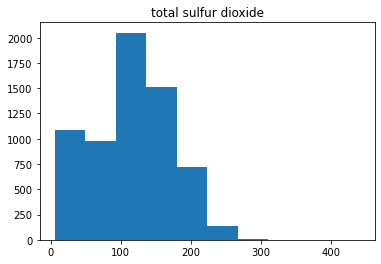

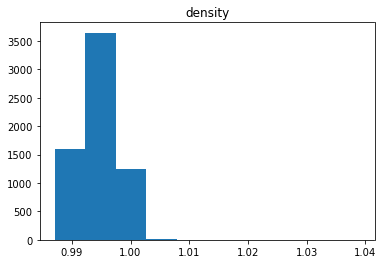

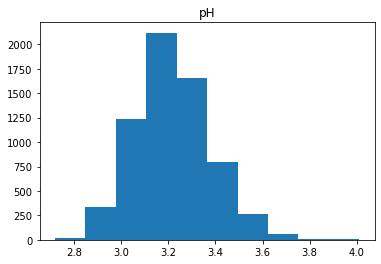

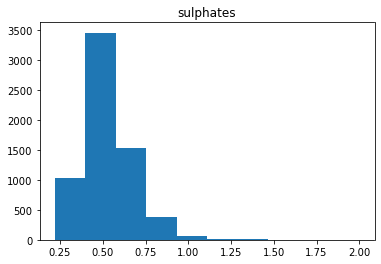

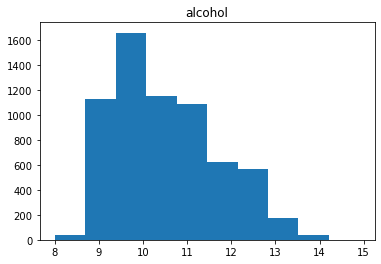

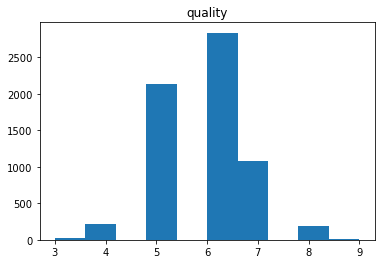

In [80]:
for col in data.columns[1:]:
    plt.hist(data[col])
    plt.title(col)
    plt.show()

In [63]:
for col in data.columns:
    if data[col].isnull().sum():
        data[col].fillna(data[col].mean(),inplace=True)

In [64]:
X=data.iloc[:,1:]
y=data.iloc[:,0]

In [65]:
sc=StandardScaler()
for col in X.columns:
    if X[col].dtype!='O':
        X[col]=sc.fit_transform(np.array(X[col]).reshape(-1,1))
        

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [67]:
# KNN

In [68]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn_preds=knn.predict(X_test)
accuracy_score(y_test,knn_preds)

0.9902564102564102

In [70]:
# Logistic regression

In [73]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_preds=lr.predict(X_test)
accuracy_score(y_test,lr_preds)

0.9866666666666667

In [74]:
# Decision tree

In [75]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_preds=tree.predict(X_test)
accuracy_score(y_test,tree_preds)

0.9846153846153847

In [76]:
# SVM

In [77]:
svc=SVC()
svc.fit(X_train,y_train)
svc_preds=svc.predict(X_test)
accuracy_score(y_test,svc_preds)

0.9943589743589744